# **WorkShop 1: Introdución a IA/ML - Procesamiento y Visualización de Datos**

¡Hola! ¡Bienvenidos a AISC Madrid y al primer taller de nuestra nueva serie! En esta serie, aprenderás paso a paso a crear un modelo de aprendizaje automático basado en un dataset.

En esta serie construimos un pequeño *pipeline* de Machine Learning de principio a fin:

- **Workshop 1 (hoy):** preprocesamiento, EDA (*exploratory data analysis*) y visualización. Entregable: un **dataset limpio** listo para modelar.  
- **Workshop 2:** regresión lineal con nuestro dataset limpio. Selección de características, partición *train/test*, métricas.  
- **Workshop 3:** introducción a redes neuronales

> Objetivo de este taller: que salgas sabiendo **cargar, explorar, limpiar y visualizar** un conjunto de datos real, y exportar un dataset limpio para usar en los próximos dos talleres. No nos centraremos tanto en la teoría, sino que profundizaremos en las aplicaciones de nuestros conocimientos.


## 1) **La importancia de los datos**

Los datos son el cimiento de cualquier proyecto de IA/ML: determinan los límites de lo que un modelo puede aprender y la fiabilidad de sus predicciones (garbage in, garbage out).

Por eso es crítico cuidarlos en todas sus fases:
- Busqueda y gobernanza (fuente, licencia, sesgos y privacidad),
- Preprocesamiento (limpieza, estandarización de formatos y tipos, tratamiento de valores ausentes y atípicos, enriquecimiento)
- Análisis exploratorio (entender distribuciones, relaciones y supuestos)
- Visualización (convertir patrones en evidencia accionable y comunicar hallazgos).

Un buen flujo de datos —documentado, reproducible y versionado— reduce sesgos, mejora la generalización, acelera la iteración con los modelos y evita malgastar tiempo ajustando algoritmos cuando el verdadero cuello de botella está en la calidad y representatividad del dataset.

## 2) **Búsqueda de bases de datos**

Existen multiples lugares donde buscar bases de datos de todo tipo. Cómo primero criterio para seleccionar una base de datos adecuada es saber que queremos hacer con nuestro modelo de ML. Entre los lugares más útiles para encontrar datasets están:

- [Kaggle Datasets](https://www.kaggle.com/datasets) — Comunidad con miles de datasets y competiciones.

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/) — Clásico repositorio académico de datasets estandarizados.


- [Google Dataset Search](https://datasetsearch.research.google.com/) — Buscador de datasets en miles de repositorios.


- [OpenML](https://www.openml.org/search?type=data) — Plataforma colaborativa con metadatos y APIs.

- [Hugging Face Datasets](https://huggingface.co/datasets) — Datasets para NLP, visión y audio listos.


> **Hoy usaremos este dataset real:** *[Amazon BestSellers 2025](https://www.kaggle.com/datasets/sanskar21072005/amazon-best-sellers-2025?resource=download)* ( base de datos con información detallada sobre los productos digitales más vendidos de Amazon en 10 mercados globales importantes: India (IN), Estados Unidos (US), Canadá (CA), Australia (AU), Alemania (DE), Francia (FR), Italia (IT), España (ES), Japón (JP) y México (MX) para el año 2025.).  

## 3) **Introducción rápida a Jupyter Notebooks**

- **Python** es un **lenguaje de programación**.  
- **Jupyter Notebook** es un **entorno interactivo** para *escribir y ejecutar* Python en celdas (y también texto Markdown como este).

>**Metáfora: “hablar español en distintos países”.**
El idioma es el mismo (Python), pero puedes “hablarlo” en distintos entornos y herramientas. Un notebook (Jupyter/Colab) es un cuaderno interactivo de celdas; hoy lo ejecutaremos en Google Colab (que usa Jupyter por debajo), pero también puedes trabajar en VS Code o JupyterLab, e instalar Python con Anaconda.

* Los cuadernos son útiles porque evitan la necesidad de ejecutar fragmentos de código costosos repetidamente.

#### *Consejos de uso*
- Una celda de **código** ejecuta Python
- Una celda **Markdown** es para texto/formulas.  
- El **orden de ejecución** importa. Puedes ejecutar celdas fuera de orden, pero el estado en memoria es el del **último** run.

In [2]:
# Demostración del orden de ejecución
x = 1
print("x =", x)

x = 1


In [3]:
# Si ejecutas esta celda antes que la anterior, x valdrá 1
x += 3
print("x ahora es", x)

x ahora es 4


Las **librerías** son colecciones de código ya hecho que añadimos a nuestros programas para poder reutilizar código. En un notebook importamos librerías con import, ejecutamos la celda y usamos sus funciones en el acto.

In [4]:
import time
from datetime import datetime

time.sleep(5)

print(datetime.now())
print("Mi nombre es Alfonso")

2025-09-04 06:51:51.918217
Mi nombre es Alfonso


## 4) **Preparar el entorno**

En el taller de hoy introduciremos 4 de las librerías más importantes y utilizadas en la Ciencia de Datos, las cuales explicaremos a continuación. Estas son: pandas, numpy, matplotlib y seaborn.

Sin embargo antes de poder utilizarlas, se deben descargar en nuestro entorno primeramente.

> **Ejecuta el siguiete bloque de código una sola vez**

In [ ]:
# Con este bloque de código instalamos todas las librerías
%pip install -q pandas numpy matplotlib seaborn

In [5]:
# Con este bloque de código importamos todas las librerías necesarias, abreviando cada una de ellas para facilitarnos su uso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 5) **¿Qué es Pandas y Numpy?**

**Pandas** es una biblioteca interactiva de **procesamiento de datos** útil para organizar, procesar, visualizar y analizar datos. Pandas es una de las herramientas más útiles que un científico de datos o un ingeniero de aprendizaje automático puede usar, ¡así que nosotros también la usaremos!

**NumPy** es la biblioteca fundamental de **cálculo numérico** en Python. Ofrece el tipo **arrays** N-dimensionales y **operaciones vectorizadas** muy rápidas, además de álgebra lineal, estadísticas básicas, y mucha sotras funciones. Muchas herramientas —incluida Pandas— se construyen sobre NumPy, así que también lo usaremos para representar y transformar datos numéricos de forma eficiente antes de modelar.

In [6]:
# NumPy
arr = np.array([1, 2, 3, 4, 5])
print("Array NumPy:", arr, "| tipo:", type(arr))

# Pandas
serie = pd.Series([10, 20, 30], name="puntos")
df_demo = pd.DataFrame({"nombre": ["Ana", "Luis", "Zoe"], "puntos": [10, 20, 30]})
display(serie)
display(df_demo)

Array NumPy: [1 2 3 4 5] | tipo: <class 'numpy.ndarray'>


,puntos
0,10
1,20
2,30


,nombre,puntos
0,Ana,10
1,Luis,20
2,Zoe,30


## 6) **Importación y Lectura de la base de datos**

Repasemos algunas habilidades básicas que necesitaremos para usar Pandas con éxito en nuestro trabajo. Pero primeramente debemos importar nuestra base de datos en el Notebook.

En el lado derecho de la pantalla encontrarás una barra vertical con el símbolo de una carpeta. Pulsa sobre ella y sube tu base de datos (**Nota**: debe estar descomprimida).

Una vez subida la base de datos deberías ver algo tal que así:

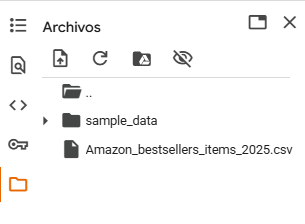

Hay varias maneras de **leer datos**, pero la más sencilla es leer un **archivo CSV almacenado localmente**. Eso es lo que hacemos aquí: simplemente le indicamos a Pandas que lea un archivo CSV con los datos almacenados localmente

In [7]:
amazon_data = pd.read_csv("/content/Amazon_bestsellers_items_2025.csv")

Pandas tiene muchas funciones que pueden usarse para obtener una buena idea de cómo se ven sus datos. Si desea echar un vistazo a su marco de datos completo, simplemente escribe el nombre del dataframe creado y presiona ejecutar:

In [8]:
amazon_data

,Unnamed: 0,rank,asin,product_title,product_price,product_star_rating,product_num_ratings,product_url,product_photo,rank_change_label,country,page
0,0,1,B073VKKNN9,Kaspersky | Premium - Total Security (Ultimate...,₹469.00,4.3,13324.0,https://www.amazon.in/dp/B073VKKNN9,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
1,1,2,B07PQZJ6Y8,"K7 Security K7, Total Security, 1 User, 1 Year...",₹370.00,4.4,2291.0,https://www.amazon.in/dp/B07PQZJ6Y8,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
2,2,3,B0D1KL34JM,Microsoft Office 2021 Professional - Lifetime ...,"₹1,799.00",4.5,388.0,https://www.amazon.in/dp/B0D1KL34JM,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
3,3,4,B07B9YYLGG,"Bitdefender - 1 Device,1 Year - Mobile Securit...",₹94.00,4.1,9630.0,https://www.amazon.in/dp/B07B9YYLGG,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
4,4,5,B073VLGMZ4,"McAfee Total Protection 2025 | 1 Device, 3 Yea...","₹1,699.00",4.4,5783.0,https://www.amazon.in/dp/B073VLGMZ4,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,96,B0DP7LBGM1,Microsoft Windows Server 2025 Standard Edition...,"$1,561.01",NaN,NaN,https://www.amazon.com.mx/dp/B0DP7LBGM1,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
995,995,97,B0CFZNMZW6,Photoshop Elements 2024 and Premiere Elements ...,"$3,067.45",4.0,82.0,https://www.amazon.com.mx/dp/B0CFZNMZW6,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
996,996,98,B09H2BRVWZ,Microsoft Office Hogar y Empresa 2021,"$5,999.00",4.9,12.0,https://www.amazon.com.mx/dp/B09H2BRVWZ,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
997,997,99,B0C55NKHKL,"Virtual DJ and Karaoke Studio 8, Lifetime, 1 D...",NaN,3.7,3.0,https://www.amazon.com.mx/dp/B0C55NKHKL,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2


A menudo, el conjunto de datos es muy grande y no resulta útil ni relevante examinarlo en su totalidad. La función head() es útil para esto, y se pueden mostrar n filas usando `dataframe.head(n)`

In [ ]:
amazon_data.head()

,Unnamed: 0,rank,asin,product_title,product_price,product_star_rating,product_num_ratings,product_url,product_photo,rank_change_label,country,page
0,0,1,B073VKKNN9,Kaspersky | Premium - Total Security (Ultimate...,₹469.00,4.3,13324.0,https://www.amazon.in/dp/B073VKKNN9,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
1,1,2,B07PQZJ6Y8,"K7 Security K7, Total Security, 1 User, 1 Year...",₹370.00,4.4,2291.0,https://www.amazon.in/dp/B07PQZJ6Y8,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
2,2,3,B0D1KL34JM,Microsoft Office 2021 Professional - Lifetime ...,"₹1,799.00",4.5,388.0,https://www.amazon.in/dp/B0D1KL34JM,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
3,3,4,B07B9YYLGG,"Bitdefender - 1 Device,1 Year - Mobile Securit...",₹94.00,4.1,9630.0,https://www.amazon.in/dp/B07B9YYLGG,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
4,4,5,B073VLGMZ4,"McAfee Total Protection 2025 | 1 Device, 3 Yea...","₹1,699.00",4.4,5783.0,https://www.amazon.in/dp/B073VLGMZ4,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1


De manera similar, `tail()` se puede utilizar para mostrar las últimas cinco filas del marco de datos:

In [ ]:
amazon_data.tail()

,Unnamed: 0,rank,asin,product_title,product_price,product_star_rating,product_num_ratings,product_url,product_photo,rank_change_label,country,page
994,994,96,B0DP7LBGM1,Microsoft Windows Server 2025 Standard Edition...,"$1,561.01",NaN,NaN,https://www.amazon.com.mx/dp/B0DP7LBGM1,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
995,995,97,B0CFZNMZW6,Photoshop Elements 2024 and Premiere Elements ...,"$3,067.45",4.0,82.0,https://www.amazon.com.mx/dp/B0CFZNMZW6,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
996,996,98,B09H2BRVWZ,Microsoft Office Hogar y Empresa 2021,"$5,999.00",4.9,12.0,https://www.amazon.com.mx/dp/B09H2BRVWZ,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
997,997,99,B0C55NKHKL,"Virtual DJ and Karaoke Studio 8, Lifetime, 1 D...",NaN,3.7,3.0,https://www.amazon.com.mx/dp/B0C55NKHKL,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
998,998,100,B091KJH72X,Corel WordPerfect Office Home & Student 2021 |...,$892.21,4.3,743.0,https://www.amazon.com.mx/dp/B091KJH72X,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2


## 7) **Análisis y Manipulación de Datos**

Antes de empezar a construir un modelo de ML para nuestro conjunto de datos,siempre es una buena práctica comprender qué contiene exactamente y cómo se ve estos datos. Pandas cuenta con varias herramientas útiles para ello.

Utiliza `info()` para ver qué tipos de datos/variables tenemos en nuestro marco de datos:

In [ ]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           999 non-null    int64  
 1   rank                 999 non-null    int64  
 2   asin                 999 non-null    object 
 3   product_title        999 non-null    object 
 4   product_price        945 non-null    object 
 5   product_star_rating  969 non-null    float64
 6   product_num_ratings  969 non-null    float64
 7   product_url          999 non-null    object 
 8   product_photo        999 non-null    object 
 9   rank_change_label    0 non-null      float64
 10  country              999 non-null    object 
 11  page                 999 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.8+ KB


Como puedes ver, la mayoría de los datos están en formato numérico. Pero también tenemos algunos objetos (probablemente en forma de cadenas) en nuestro conjunto de datos, ¡y tendremos que gestionarlos más adelante!

Utiliza `describe()` para obtener estadísticas básicas sobre datos numéricos en su marco de datos.



In [ ]:
amazon_data.describe()

,Unnamed: 0,rank,product_star_rating,product_num_ratings,rank_change_label,page
count,999.000000,999.000000,969.000000,969.000000,0.0,999.000000
mean,499.000000,50.450450,4.140248,1312.546956,NaN,1.499499
std,288.530761,28.852421,0.496382,3025.241537,NaN,0.500250
min,0.000000,1.000000,1.000000,1.000000,NaN,1.000000
25%,249.500000,25.500000,3.900000,54.000000,NaN,1.000000
50%,499.000000,50.000000,4.200000,218.000000,NaN,1.000000
75%,748.500000,75.000000,4.400000,1009.000000,NaN,2.000000
max,998.000000,100.000000,5.000000,19189.000000,NaN,2.000000


Otra función muy interesante dentro de pandas en `isna()` la cual se utiliza para ver si tenemos valores faltantes en nuestros datos:

In [9]:
amazon_data.isna().sum()

,0
Unnamed: 0,0
rank,0
asin,0
product_title,0
product_price,54
product_star_rating,30
product_num_ratings,30
product_url,0
product_photo,0
rank_change_label,999


Acceder a filas o columnas específicas en marcos de datos es muy sencillo. Hay varias maneras de acceder a diferentes filas y columnas. La forma más fácil de acceder a una columna es usando el nombre de la columna:

In [10]:
amazon_data[['product_title','product_star_rating']]

,product_title,product_star_rating
0,Kaspersky | Premium - Total Security (Ultimate...,4.3
1,"K7 Security K7, Total Security, 1 User, 1 Year...",4.4
2,Microsoft Office 2021 Professional - Lifetime ...,4.5
3,"Bitdefender - 1 Device,1 Year - Mobile Securit...",4.1
4,"McAfee Total Protection 2025 | 1 Device, 3 Yea...",4.4
...,...,...
994,Microsoft Windows Server 2025 Standard Edition...,NaN
995,Photoshop Elements 2024 and Premiere Elements ...,4.0
996,Microsoft Office Hogar y Empresa 2021,4.9
997,"Virtual DJ and Karaoke Studio 8, Lifetime, 1 D...",3.7


También puede utilizar `iloc[]` para acceder a las columnas por su índice:

In [11]:
# El primer índice hace referencia a las filas, el segundo a las columnas, por ello así accedemos todas las filas y sus valores en las columnas 2 y 3
amazon_data.iloc[:,[2,3]]

# Prueba ahora a sacar las todos los valores de las filas 2 y 3
#amazon_data.iloc[[2,3],:]

,asin,product_title
0,B073VKKNN9,Kaspersky | Premium - Total Security (Ultimate...
1,B07PQZJ6Y8,"K7 Security K7, Total Security, 1 User, 1 Year..."
2,B0D1KL34JM,Microsoft Office 2021 Professional - Lifetime ...
3,B07B9YYLGG,"Bitdefender - 1 Device,1 Year - Mobile Securit..."
4,B073VLGMZ4,"McAfee Total Protection 2025 | 1 Device, 3 Yea..."
...,...,...
994,B0DP7LBGM1,Microsoft Windows Server 2025 Standard Edition...
995,B0CFZNMZW6,Photoshop Elements 2024 and Premiere Elements ...
996,B09H2BRVWZ,Microsoft Office Hogar y Empresa 2021
997,B0C55NKHKL,"Virtual DJ and Karaoke Studio 8, Lifetime, 1 D..."


Con esta misma función se puede acceder a las filas que nosotros queramos

In [12]:
product_index_4 = amazon_data.iloc[4]
product_index_4

,4
Unnamed: 0,4
rank,5
asin,B073VLGMZ4
product_title,"McAfee Total Protection 2025 | 1 Device, 3 Yea..."
product_price,"₹1,699.00"
product_star_rating,4.4
product_num_ratings,5783.0
product_url,https://www.amazon.in/dp/B073VLGMZ4
product_photo,https://images-eu.ssl-images-amazon.com/images...
rank_change_label,NaN


Las funciones de busqueda y manipulación de datos son muy útiles

In [13]:
# Vamos a buscar todos los productos que tengan 1 estrella en nuestra base de datos
amazon_data.loc[amazon_data['product_star_rating'] == 1.0, 'product_title']

,product_title
305,Adobe Lightroom + Lightroom-Classic 1 TB stora...
354,Microsoft 365 Business Standard - 1 Year Subsc...
389,MS Office 2019 Professional PLUS | With USB an...
952,Microsoft 365 Empresa (12 Meses) - Standard - ...
980,Microsoft Office Home and Business 2024 | Comp...


In [14]:
# Vamos a buscar ahora todos los productos cuyo precio sea menor de 5
amazon_data.loc[amazon_data['product_price'] >= 5.0, 'product_title']

TypeError: '>=' not supported between instances of 'str' and 'float'

##### **¿Cúal es el problema?**

Antes de modelar, es clave **entender el valor y el tipo de dato** con el que trabajamos: no es lo mismo un precio en **texto** con símbolos y comas que un **numérico** en una moneda concreta, ni una fecha como cadena que un objeto datetime.

Un buen **preprocesamiento** (limpieza, conversión de tipos, normalización de unidades/monedas y manejo de nulos) garantiza que los algoritmos reciban información coherente y comparable. A veces hay que **manipular** los datos —por ejemplo, convertir precios en ₹ y $ a dólares numéricos— para poder analizarlos, visualizarlos y entrenar modelos de forma fiable.

In [15]:
def prices_to_usd_simple(series: pd.Series, inr_to_usd: float = 0.01205) -> pd.Series:
    """
    Función que convierte todos los valores de texto del precio en un vector numérico.
    Pasamos todos los valores de '₹' a '$'
    """
    s = series.astype(str)                      # Convertimos la columna a texto para poder limpiarla.
    is_inr = s.str.contains(r"₹", na=False)     # Creamos una máscara booleana: True si lleva símbolo de rupia.

    # Extrae el número: elimina todo salvo dígitos y el punto decimal.
    nums = s.str.replace(r"[^\d.]", "", regex=True)  # Quita símbolos ($, ₹), comas y letras.
    nums = pd.to_numeric(nums, errors="coerce")      # Pasa a número; si no puede, pone NaN.

    usd = nums.copy()                               # Copiamos los números “tal cual” (asumimos USD por defecto).
    usd[is_inr] = usd[is_inr] * inr_to_usd          # Donde había rupias, convertimos a USD con la tasa dada.
    return usd                                      # Devolvemos la serie numérica en dólares.


In [16]:
numeric_price = prices_to_usd_simple(amazon_data["product_price"])
amazon_data["numeric_price"] = numeric_price
amazon_data.tail()

,Unnamed: 0,rank,asin,product_title,product_price,product_star_rating,product_num_ratings,product_url,product_photo,rank_change_label,country,page,numeric_price
994,994,96,B0DP7LBGM1,Microsoft Windows Server 2025 Standard Edition...,"$1,561.01",NaN,NaN,https://www.amazon.com.mx/dp/B0DP7LBGM1,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2,1561.01
995,995,97,B0CFZNMZW6,Photoshop Elements 2024 and Premiere Elements ...,"$3,067.45",4.0,82.0,https://www.amazon.com.mx/dp/B0CFZNMZW6,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2,3067.45
996,996,98,B09H2BRVWZ,Microsoft Office Hogar y Empresa 2021,"$5,999.00",4.9,12.0,https://www.amazon.com.mx/dp/B09H2BRVWZ,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2,5999.00
997,997,99,B0C55NKHKL,"Virtual DJ and Karaoke Studio 8, Lifetime, 1 D...",NaN,3.7,3.0,https://www.amazon.com.mx/dp/B0C55NKHKL,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2,NaN
998,998,100,B091KJH72X,Corel WordPerfect Office Home & Student 2021 |...,$892.21,4.3,743.0,https://www.amazon.com.mx/dp/B091KJH72X,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2,892.21


## 8) **Limpieza de los datos**

  La limpieza de datos garantiza que la información sea coherente, completa y utilizable. Por ahora, hemos realizado una estrategia común que  consiste en corregir tipos (números/fechas) como era el caso de `product_price`; aunque también hay otras estrategias como estandarizar unidades (p. ej., monedas), eliminar duplicados y valores imposibles, o maneja nulos/outliers.
  
 Un buen preprocesamiento reduce errores, acelera el análisis y hace que los modelos aprendan sobre datos fiables y comparables, no sobre ruido.

 Para continuar con nueestro análisis, hay variables en nuestro dataset que no nos interesan o que no nos aportan mucha información relevante. Por ello, vamos a limpiarlo!

In [17]:
# Guardamos en un array el nombre de las variables que nos interesa mantener
keep_cols = [
    "Unnamed: 0",
    "product_title",
    "numeric_price",
    "product_star_rating",
    "product_num_ratings",
    "country",
    "page",
]

# (Opcional aunque recomendable) Aviso si alguna no existe
missing = [c for c in keep_cols if c not in amazon_data.columns]
if missing:
    print("Advertencia: faltan las siguientes columnas ->", missing)

# Crear el subconjunto limpio (solo las que existan)
clean_amazon_data = amazon_data[[c for c in keep_cols if c in amazon_data.columns]].copy()

# Vista rápida
print(clean_amazon_data.shape)
clean_amazon_data.head()

(999, 7)


,Unnamed: 0,product_title,numeric_price,product_star_rating,product_num_ratings,country,page
0,0,Kaspersky | Premium - Total Security (Ultimate...,5.65145,4.3,13324.0,IN,1
1,1,"K7 Security K7, Total Security, 1 User, 1 Year...",4.45850,4.4,2291.0,IN,1
2,2,Microsoft Office 2021 Professional - Lifetime ...,21.67795,4.5,388.0,IN,1
3,3,"Bitdefender - 1 Device,1 Year - Mobile Securit...",1.13270,4.1,9630.0,IN,1
4,4,"McAfee Total Protection 2025 | 1 Device, 3 Yea...",20.47295,4.4,5783.0,IN,1


Vamos a ver ahora cuantos valores nulos tenemos en nuestro dataset para limpiarlo

In [38]:
clean_amazon_data.isna().sum()

,0
Unnamed: 0,0
product_title,0
numeric_price,54
product_star_rating,30
product_num_ratings,30
country,0
page,0


Podemos ver que nuestro dataset tiene valores nulos, pero no valores vacíos. Hay diferentes entrategias avanzadas para resolver estas incoherencias, pero estos valores no afectan en gran medidia a nuestro análisis por lo que podemos concluir que nuestro datase ya está limpio

## 9) **Visualización de Datos**

La **visualización de datos** es la forma más rápida de **detectar patrones, errores y relaciones** que no saltan a la vista en una tabla: ayuda a validar supuestos, encontrar outliers, entender distribuciones y tendencias, y comunicar hallazgos con claridad a cualquier público. Un buen gráfico ahorra iteraciones de análisis y acelera decisiones en ciencia de datos, guiando qué limpiar, qué transformar y qué variables priorizar antes de modelar.

Para ello se suelen utilizar dos librerías:
- **Matplotlib**: la biblioteca base de gráficos 2D en Python. Ofrece control fino (figuras, ejes, estilos) y es el fundamento sobre el que se apoyan muchas otras librerías, incluido el .plot() de pandas.

- **Seaborn**: capa de alto nivel sobre Matplotlib con estilos por defecto y funciones estadísticas listas para usar. Se integra muy bien con DataFrames de pandas y facilita gráficos como histplot, boxplot, regplot, heatmap o pairplot con muy poco código.

Primero, vamos a realizar un **histograma** de las valoraciones con estrellas de los usuarios de aquellos productos que se encuentran en la primera página

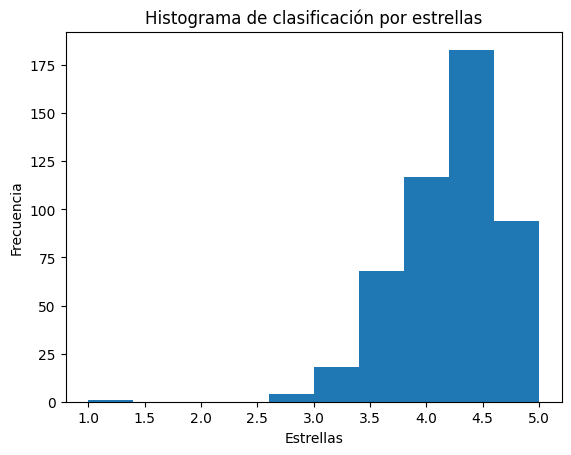

In [34]:
ratings_p1 = clean_amazon_data.loc[clean_amazon_data['page'] == 1, 'product_star_rating'].dropna()

num_bins = 10 # número de grupos

plt.figure()
plt.hist(ratings_p1, num_bins)
plt.xlabel("Estrellas")
plt.ylabel("Frecuencia")
plt.title("Histograma de clasificación por estrellas")
plt.show()

Habrá mucha diferencia con aquellos que están en la segunda página? Vamos a comprobarlo!

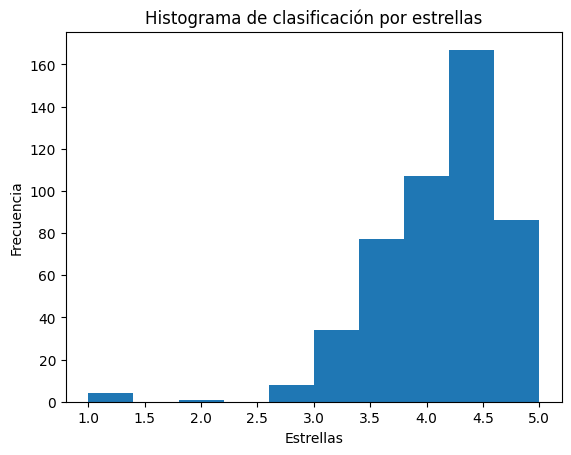

In [35]:
ratings_p2 = clean_amazon_data.loc[clean_amazon_data['page'] == 2, 'product_star_rating'].dropna()

num_bins = 10 # número de grupos

plt.figure()
plt.hist(ratings_p2, num_bins)
plt.xlabel("Estrellas")
plt.ylabel("Frecuencia")
plt.title("Histograma de clasificación por estrellas")
plt.show()

No parece gran diferencia verdad? Pero ojo, tenemos que tener en cuenta que las dos gráficas no tienen la misma escala en el eje Y. Vamos a superponerlas y veamos si la diferencia real !

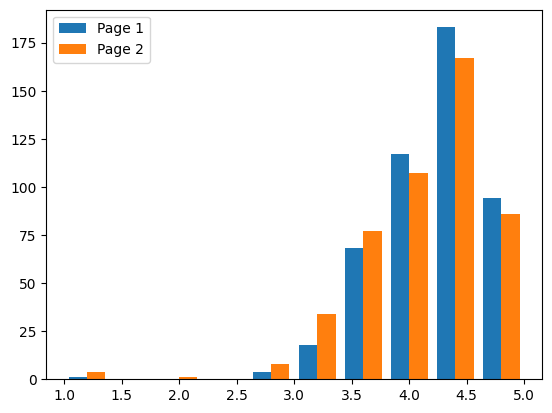

In [20]:
num_bins=10

plt.hist([ratings_p1, ratings_p2], num_bins, label=['Page 1', 'Page 2'])
plt.legend(loc='upper left')
plt.show()

Vamos a visualizar ahora la distribucion de los productos con más de 4.5 estrellas por países

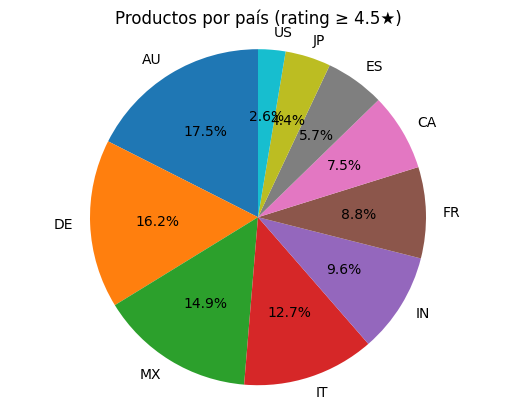

In [ ]:
# Conteo de productos por país (ignorando nulos)
counts = (amazon_data.loc[amazon_data['product_star_rating'] >= 4.5, 'country']
          .dropna()
          .value_counts()
          .sort_values(ascending=False))

plt.figure()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Productos por país (rating ≥ 4.5★)')
plt.axis('equal')  # círculo perfecto
plt.show()


También suele ser útil observar cómo se relacionan entre sí las diferentes variables. `corr()` es una función útil para esto. Sin embargo, la correlación solo se puede hacer con variables de tipo numérico, asi que vamos a hacer un nuevo database de los valores numericos para poder ver si existe alguna relaicón entre ellos

In [26]:
# Guardamos en un array el nombre de las variables que nos interesa mantener
keep_num_cols = [
    "numeric_price",
    "product_star_rating",
    "product_num_ratings",
    "page",
]

# (Opcional aunque recomendable) Aviso si alguna no existe
missing = [c for c in keep_num_cols if c not in clean_amazon_data.columns]
if missing:
    print("Advertencia: faltan las siguientes columnas ->", missing)

num_clean_amazon_data = clean_amazon_data[[c for c in keep_num_cols if c in clean_amazon_data.columns]].copy()

# Vista rápida
print(num_clean_amazon_data.shape)
num_clean_amazon_data.head()

(999, 4)


,numeric_price,product_star_rating,product_num_ratings,page
0,5.65145,4.3,13324.0,1
1,4.45850,4.4,2291.0,1
2,21.67795,4.5,388.0,1
3,1.13270,4.1,9630.0,1
4,20.47295,4.4,5783.0,1


In [27]:
c = num_clean_amazon_data.corr()
c

,numeric_price,product_star_rating,product_num_ratings,page
numeric_price,1.000000,-0.073334,-0.103530,0.000472
product_star_rating,-0.073334,1.000000,0.126001,-0.083120
product_num_ratings,-0.103530,0.126001,1.000000,-0.136304
page,0.000472,-0.083120,-0.136304,1.000000


Solo con los números puede ser una forma difícil de ver la relación entre variables. Una forma interesante de visualizar esta correlación es utilizando la función de mapa de calor de la biblioteca seaborn:

<Axes: >

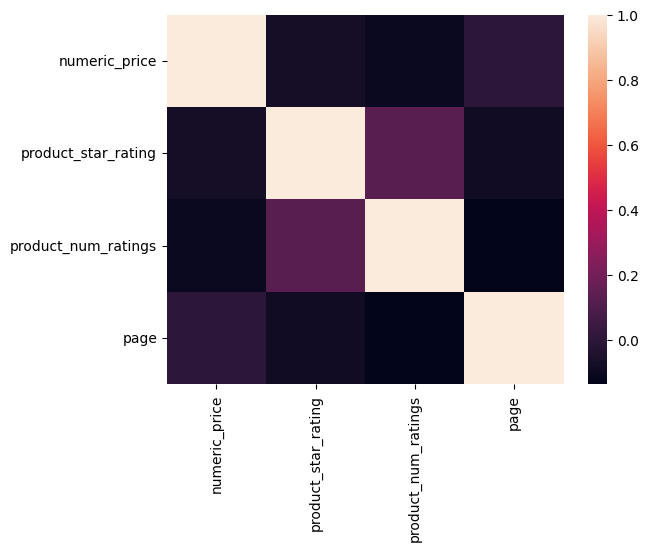

In [28]:
sns.heatmap(c)

**¿Qué variables puede ser iteresante analizar viendo este mapa de calor?**

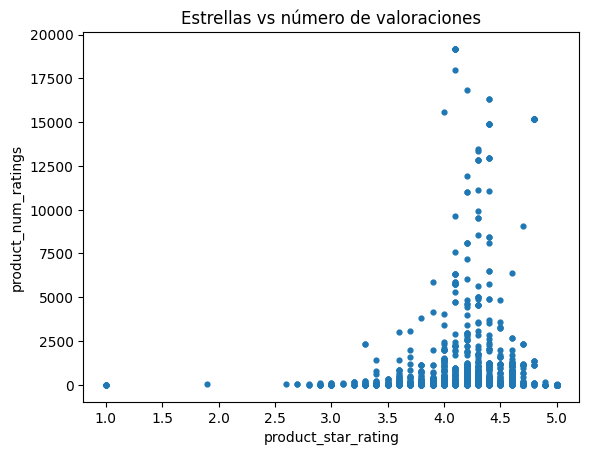

In [30]:
xy = clean_amazon_data[['product_star_rating', 'product_num_ratings']].dropna()

plt.figure()
plt.scatter(xy['product_star_rating'], xy['product_num_ratings'], s=12)
plt.xlabel('product_star_rating')
plt.ylabel('product_num_ratings')
plt.title('Estrellas vs número de valoraciones')
plt.show()

## 10) **Exportación de datos**

Con los datos ya limpios y coherentes, el siguiente paso es exportarlos para compartirlos y reutilizarlos en futuros proyectos. el formato más común suele ser la exportación en `.csv`

In [41]:
clean_amazon_data.to_csv("clean_amazon_data.csv", index=False, encoding="utf-8")